# 0 - Setup and Introduction



## Downloading the tutorial datasets from Zenodo
Here we download the tutorial datasets from Zenodo. The datasets are formatted as feather files, which are a fast and efficient way to store dataframes in Python. They will be copied to the `Data` folder in the working directory.
In addition to the datasets, it will also download the embeddings that are going to be used later in the tutorial.

The dataset covers the period between 2020-06-25 and 2020-07-02 and are related to the first 2024 presidential debate, containing posts that mention the terms "biden", "debate", and "trump". Both mastodon and bluesky datasets are included.

In [ ]:
import requests
import os
from tqdm.auto import tqdm

def download_zenodo_files(doi_or_id, output_dir):
    if doi_or_id.startswith("10."):
        api_url = f"https://zenodo.org/api/records/?q=doi:{doi_or_id}"
    else:
        api_url = f"https://zenodo.org/api/records/{doi_or_id}"
    
    response = requests.get(api_url)
    response.raise_for_status()
    data = response.json()
    
    if doi_or_id.startswith("10."):
        data = data['hits']['hits'][0]
    
    os.makedirs(output_dir, exist_ok=True)
    
    for file_info in data['files']:
        file_url = file_info['links']['self']
        file_name = file_info['key']
        
        # Stream the file download
        with requests.get(file_url, stream=True) as response:
            response.raise_for_status()
            total_size = int(response.headers.get('content-length', 0))
            chunk_size = 1024
            output_path = os.path.join(output_dir, file_name)
            with open(output_path, 'wb') as file, tqdm(
                total=total_size, unit='B', unit_scale=True, desc=file_name
            ) as progress_bar:
                for chunk in response.iter_content(chunk_size=chunk_size):
                    if chunk:
                        file.write(chunk)
                        progress_bar.update(len(chunk))
        
        print(f"File {file_name} downloaded and saved to {output_path}")

doi_or_id = '10.5281/zenodo.12748042'  
output_dir = 'Data'  
download_zenodo_files(doi_or_id, output_dir)

## Mastodon data collection
Mastodon data can be collected using a streamer that listens to the Mastodon API. The streamer code is available in the repository:

https://github.com/osome-iu/OSoMeMastodonStreamer/tree/simple_streamer

Note that you need to create an API key for all the servers you want to collect data from. The API key is generated in the settings of the Mastodon account.

You can then run the script in `network/utilities/preprocessMastodon.py` to preprocess and generate a file that will work in our pipeline. You should change in the script, the location of the json files generated by the streamer.

### Obtaining the API access key
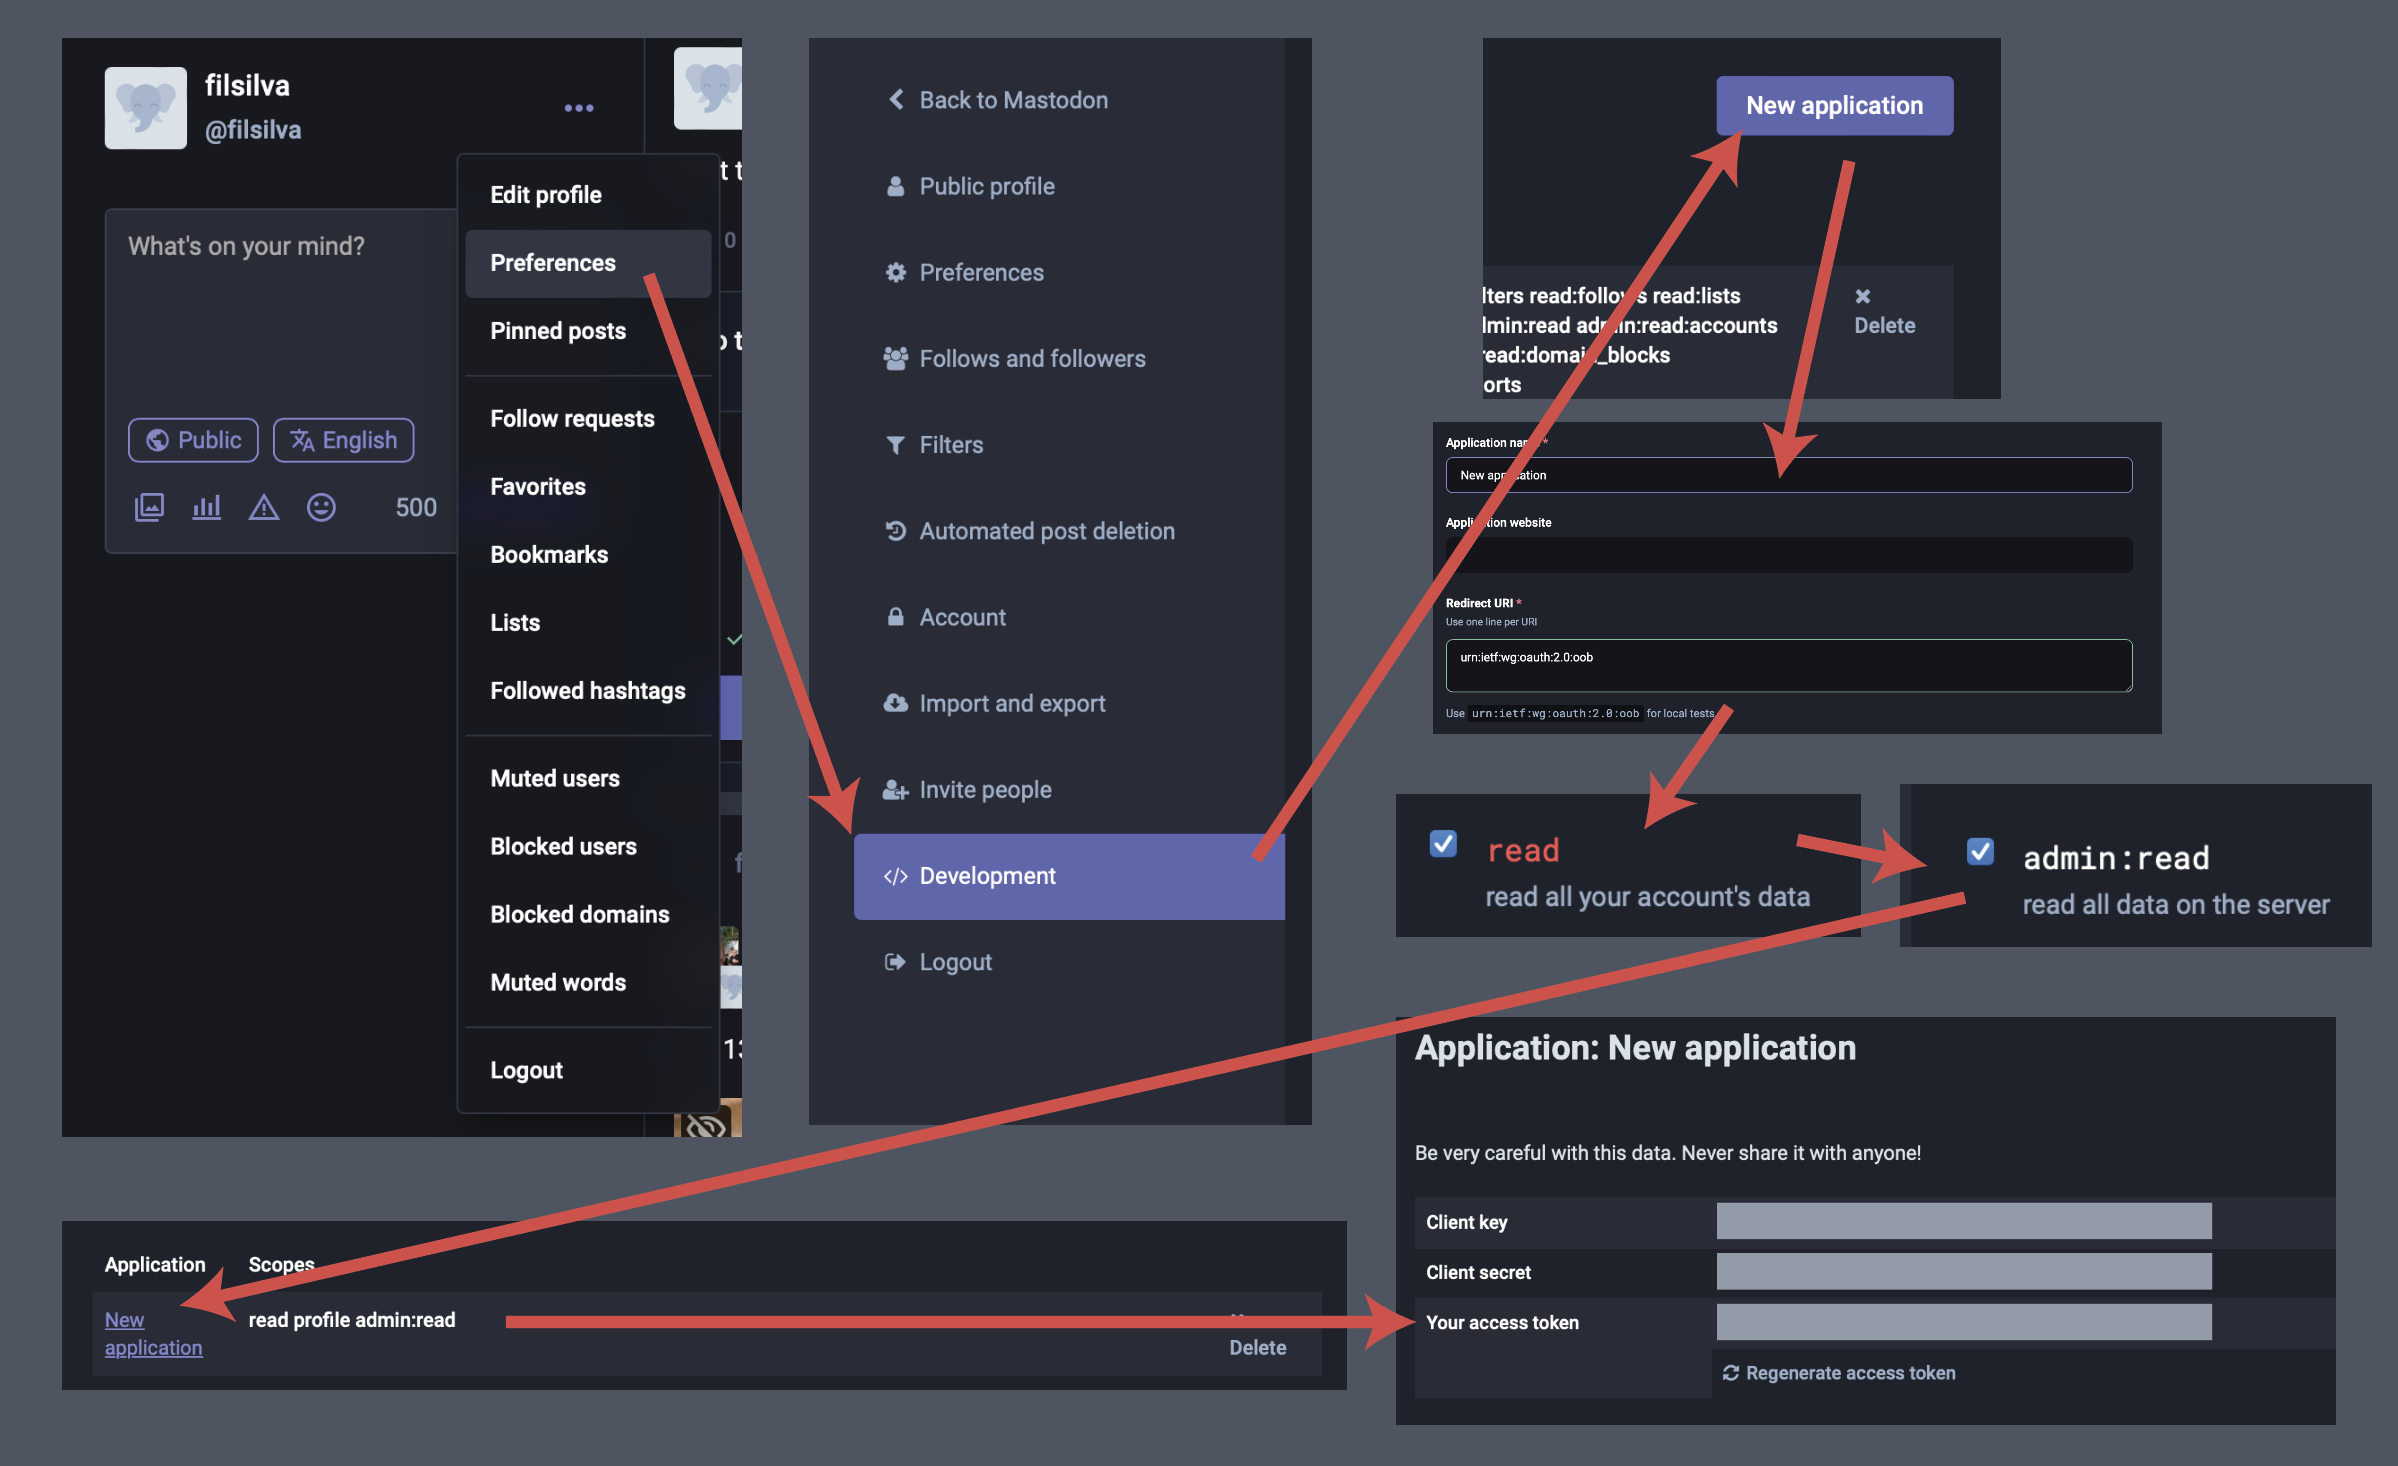

## Bluesky data collection
Bluesky streamer currently does not require an API key. The streamer code is available in the repository:

https://github.com/osome-iu/osome-bluesky-streamer

From the command-line you can clone the repository by running:

```bash
git clone https://github.com/osome-iu/osome-bluesky-streamer.git
```

Then install the required packages by running:

```bash
cd osome-bluesky-streamer
pip install atproto
```

You can then run the streamer by running:

```bash
python firehose_streamer.py
```

It will run continuously and save the data in a json file. You can stop the streamer by pressing `Ctrl+C`.

You can then run the script in `network/utilities/preprocessBluesky.py` to preprocess and generate a file that will work in our pipeline. You should change in the script, the location of the json files generated by the streamer.
